In [1]:
"""
This scripts runs additional pre-processing on the output
in the first notebook and then runs Random Forest Classifier,
Decision Tree Classifier and Logistic Regression to determine
the optimal model for detecting whether a word is an emotion.
"""

In [14]:
import pandas as pd
import ast

main_df = pd.read_csv('res.csv')

In [15]:
main_df.head()

,index,prediction,cleaned_index,Label,self_auth,self_class,self_deg,self_betcent,pred_betcent,pred_auth,pred_deg,pred_class,string,from_textid
0,consistently_2,"['also', 'being', 'actually', 'currently', 'st...",consistently,consistently,0.000209,25.0,10.0,0.000000,"[0.0, 0.0, 0.0, -1, 155965.9877]","[0.000391, 0.000651, 0.000391, -1, 0.000269]","[33, 125, 7, -1, 136]","[9, 3, 21, -1, 16]",Saxobank is consistently rated very poorly fro...,0
1,rated_3,"['performing', 'doing', 'functioning', 'workin...",rated,NaN,NaN,NaN,NaN,NaN,"[-1, 174890.4158, -1, 481.203593, 47866.10398]","[-1, 0.001086, -1, 0.001485, 0.000102]","[-1, 169, -1, 19, 9]","[-1, 25, -1, 8, 9]",Saxobank is consistently rated very poorly fro...,0
2,poorly_5,"['highly', 'high', 'low', 'well', 'poorly']",poorly,poorly,0.001552,11.0,10.0,194.873669,"[1816.335264, 0.0, 39966.12492, 0.0, 194.873669]","[0.015114, 0.00691, 0.005939, 0.0034, 0.001552]","[176, 198, 173, 135, 10]","[25, 23, 11, 5, 11]",Saxobank is consistently rated very poorly fro...,0
3,seen_10,"['written', 'done', 'read', 'said']",seen,NaN,NaN,NaN,NaN,NaN,"[-1, 0.0, 35.951423, -1]","[-1, 0.002634, 1.1e-05, -1]","[-1, 18, 8, -1]","[-1, 17, 0, -1]",Saxobank is consistently rated very poorly fro...,0
4,contradicting_17,"['but', 'and']",contradicting,NaN,NaN,NaN,NaN,NaN,"[6263.708295, 10269.73499]","[8.6e-05, 0.000116]","[26, 10]","[18, 8]",Saxobank is consistently rated very poorly fro...,0


In [16]:
### Renames the index column and snippet column
main_df = main_df.rename(columns = {"Unnamed: 0":"index","string":"snippet"})

In [17]:
"""
Reads the exported Gephi file and assigns
boolean values according to whether each label
is an emotion or not
"""
emotions = pd.read_csv("../source_data/gephi_output_cleaned.csv")[['Label','KEEP? (Y/N)']].rename(columns = {"KEEP? (Y/N)":"emo?"})
emotions = emotions.dropna()
emotions = emotions[emotions['emo?'].str.contains("Y|N")]
emotions['emo?'] = emotions['emo?'].apply(lambda x: 1 if x == "Y" else 0)

In [18]:
# Combines the pre-processed notebook with emotion labels
main_df = pd.merge(main_df, emotions, left_on = 'cleaned_index', right_on = 'Label', how = 'left').dropna(subset = ['Label_y'])

In [19]:
# Checks for records where predicted betweenness centrality only has 1 element or if the first element is equals to -1 as this infers it is masked
main_df['kind_of_useless'] = main_df.pred_betcent.apply(lambda x: True if len(list(set(ast.literal_eval(x)))) == 1 and list(set(ast.literal_eval(x)))[0] == -1 else False)

In [20]:
# Boolean mask to extract the remaining records
main_df = main_df[main_df.kind_of_useless == False]

In [21]:
# Check the value counts of emotion vs non-emotion words
main_df['emo?'].value_counts()

0.0    4
1.0    3
Name: emo?, dtype: int64

### Get words that do not denote emotions, that contain useful information
i.e. : 
* pred_betcent list length is > 0 
* the pred elements contain useful information 
* is not emotion denoting words

##### Id the TextData

In [31]:
main_df.head()

,index,prediction,cleaned_index,Label_x,self_auth,self_class,self_deg,self_betcent,pred_betcent,pred_auth,pred_deg,pred_class,snippet,from_textid,Label_y,emo?,kind_of_useless
0,consistently_2,"['also', 'being', 'actually', 'currently', 'st...",consistently,consistently,0.000209,25.0,10.0,0.000000,"[0.0, 0.0, 0.0, -1, 155965.9877]","[0.000391, 0.000651, 0.000391, -1, 0.000269]","[33, 125, 7, -1, 136]","[9, 3, 21, -1, 16]",Saxobank is consistently rated very poorly fro...,0,consistently,0.0,False
2,poorly_5,"['highly', 'high', 'low', 'well', 'poorly']",poorly,poorly,0.001552,11.0,10.0,194.873669,"[1816.335264, 0.0, 39966.12492, 0.0, 194.873669]","[0.015114, 0.00691, 0.005939, 0.0034, 0.001552]","[176, 198, 173, 135, 10]","[25, 23, 11, 5, 11]",Saxobank is consistently rated very poorly fro...,0,poorly,1.0,False
5,point_19,"['pointing', 'pointed', 'point', 'points', 'fi...",point,point,0.002054,24.0,242.0,0.000000,"[-1, -1, 0.0, -1, -1]","[-1, -1, 0.002054, -1, -1]","[-1, -1, 242, -1, -1]","[-1, -1, 24, -1, -1]",Saxobank is consistently rated very poorly fro...,0,point,0.0,False
7,sense_28,"['good', 'quality', 'general', 'new', 'strict']",sense,sense,0.000308,4.0,116.0,0.000000,"[0.0, 0.0, 10972.03876, 2012.54884, 287.247587]","[0.013005, 0.101255, 0.000135, 0.001431, 0.000...","[398, 229, 13, 59, 43]","[18, 17, 5, 10, 12]",Saxobank is consistently rated very poorly fro...,0,sense,0.0,False
24,entire_7,"['new', 'old', 'entire', 'former', 'current']",entire,entire,0.002084,5.0,84.0,0.000000,"[2012.54884, 0.0, 0.0, 0.0, 3153.12649]","[0.001431, 0.000349, 0.002084, 0.000104, 0.001...","[59, 66, 84, 22, 61]","[10, 10, 5, 15, 8]",I wonder what would happen if the entire WSB a...,4,entire,0.0,False


In [32]:
all_data_ = main_df.copy()
all_data_ = all_data_.drop(columns = ['kind_of_useless'])
all_data_ = all_data_.drop(columns = ['Label_y']).rename(columns = {"Label_x":"Label"})

In [33]:
all_data_.head(5)

,index,prediction,cleaned_index,Label,self_auth,self_class,self_deg,self_betcent,pred_betcent,pred_auth,pred_deg,pred_class,snippet,from_textid,emo?
0,consistently_2,"['also', 'being', 'actually', 'currently', 'st...",consistently,consistently,0.000209,25.0,10.0,0.000000,"[0.0, 0.0, 0.0, -1, 155965.9877]","[0.000391, 0.000651, 0.000391, -1, 0.000269]","[33, 125, 7, -1, 136]","[9, 3, 21, -1, 16]",Saxobank is consistently rated very poorly fro...,0,0.0
2,poorly_5,"['highly', 'high', 'low', 'well', 'poorly']",poorly,poorly,0.001552,11.0,10.0,194.873669,"[1816.335264, 0.0, 39966.12492, 0.0, 194.873669]","[0.015114, 0.00691, 0.005939, 0.0034, 0.001552]","[176, 198, 173, 135, 10]","[25, 23, 11, 5, 11]",Saxobank is consistently rated very poorly fro...,0,1.0
5,point_19,"['pointing', 'pointed', 'point', 'points', 'fi...",point,point,0.002054,24.0,242.0,0.000000,"[-1, -1, 0.0, -1, -1]","[-1, -1, 0.002054, -1, -1]","[-1, -1, 242, -1, -1]","[-1, -1, 24, -1, -1]",Saxobank is consistently rated very poorly fro...,0,0.0
7,sense_28,"['good', 'quality', 'general', 'new', 'strict']",sense,sense,0.000308,4.0,116.0,0.000000,"[0.0, 0.0, 10972.03876, 2012.54884, 287.247587]","[0.013005, 0.101255, 0.000135, 0.001431, 0.000...","[398, 229, 13, 59, 43]","[18, 17, 5, 10, 12]",Saxobank is consistently rated very poorly fro...,0,0.0
24,entire_7,"['new', 'old', 'entire', 'former', 'current']",entire,entire,0.002084,5.0,84.0,0.000000,"[2012.54884, 0.0, 0.0, 0.0, 3153.12649]","[0.001431, 0.000349, 0.002084, 0.000104, 0.001...","[59, 66, 84, 22, 61]","[10, 10, 5, 15, 8]",I wonder what would happen if the entire WSB a...,4,0.0


### Masking the data with - 1 does not work with large datasets, drop these

# Note
This jupyter notebook is used to train simple model to predict emo-denoting words from the BERT prediction output

### Training Data Preparation
* Part of the BERT prediction output shall be labelled with 1/0 for emotion-denoting under a 'Label' column
* The labelled part of the data are used in the supervised training with 30% of them used as validation set
* **bert_output_path** is a variable for you to pass the path of the bert model prediction output from the BERT model prediction notebook

### Model Training
* Three models (random forest, decision tree, logistic regression) are included in the code for your model selection , feature importance, accuracy and f1-score on the test set
* Change **model_select** variable to the desired one

### Model Prediction result
* Ouput file name **emo_pred_file_name** can be modified in the first cell

In [34]:
import pandas as pd
import random
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import pickle


### folder directory
output_folder="New_RunTime_Output/"
model_save_folder = "GME_Models/"


### read the BERT output csv file with "emo?" label 
emo_pred_file_name="pred_with_rfc"


## Model input data processing

In [35]:
bert_output = all_data_.copy()

In [36]:
input_text = bert_output[['index','Label','self_auth','self_deg','self_betcent','pred_auth','pred_deg','pred_betcent','from_textid']]
"""
Make sure you have your emotions column as the y column
"""
### This is the prediction results
bert_y = bert_output['emo?']

In [37]:
### get the training data for the emo-denoting word prediction , get those data with "Label"
### Reformat the data such that the values are -1
for col in ['self_auth','self_deg','self_betcent']:
    input_text.loc[input_text['Label'].isna(),col] =- 1

C:\Users\winst\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [38]:
"""
Calculate average auth score from the BERT predicted words
by cumulatively summing the scores divided by the total count
to get the average
"""

def cal_avg_pred_score(row):
    count = 0
    sum_ = 0
    for item in row:
        item = item.strip()
        # -1 is used to mask missing values
        if item.strip() != '-1' or item.strip() != "":
            try:
                sum_ += float(item)
                count+= 1
            except: 
                pass
    if count==0:
        return 0
    else:
        return sum_/count

In [39]:
input_text

,index,Label,self_auth,self_deg,self_betcent,pred_auth,pred_deg,pred_betcent,from_textid
0,consistently_2,consistently,0.000209,10.0,0.000000,"[0.000391, 0.000651, 0.000391, -1, 0.000269]","[33, 125, 7, -1, 136]","[0.0, 0.0, 0.0, -1, 155965.9877]",0
2,poorly_5,poorly,0.001552,10.0,194.873669,"[0.015114, 0.00691, 0.005939, 0.0034, 0.001552]","[176, 198, 173, 135, 10]","[1816.335264, 0.0, 39966.12492, 0.0, 194.873669]",0
5,point_19,point,0.002054,242.0,0.000000,"[-1, -1, 0.002054, -1, -1]","[-1, -1, 242, -1, -1]","[-1, -1, 0.0, -1, -1]",0
7,sense_28,sense,0.000308,116.0,0.000000,"[0.013005, 0.101255, 0.000135, 0.001431, 0.000...","[398, 229, 13, 59, 43]","[0.0, 0.0, 10972.03876, 2012.54884, 287.247587]",0
24,entire_7,entire,0.002084,84.0,0.000000,"[0.001431, 0.000349, 0.002084, 0.000104, 0.001...","[59, 66, 84, 22, 61]","[2012.54884, 0.0, 0.0, 0.0, 3153.12649]",4
33,mean_2,mean,0.102042,423.0,97091.279300,"[0.000248, 0.000348, -1, 0.01506]","[31, 144, -1, 155]","[104792.6541, 0.0, -1, 44742.32375]",7
44,safe_28,safe,0.000259,14.0,70.224625,"[0.000251, 0.000332, 0.000116, 0.002862, 4.7e-05]","[58, 48, 10, 199, 6]","[0.0, 11410.48432, 10269.73499, 0.0, 0.0]",9


In [40]:
### convert string list to float list for further calculations
for col in ['pred_auth','pred_deg','pred_betcent']:
    input_text[col] = input_text[col].str.replace("'","",).str.replace("[","").str.replace("]","").str.split(',')

C:\Users\winst\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\winst\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
### Run avg calculation for the following columns
for col in ['pred_auth','pred_deg','pred_betcent']:
    input_text['avg_'+col]= input_text[col].map(lambda x: cal_avg_pred_score(x))

C:\Users\winst\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
input_text.head()

,index,Label,self_auth,self_deg,self_betcent,pred_auth,pred_deg,pred_betcent,from_textid,avg_pred_auth,avg_pred_deg,avg_pred_betcent
0,consistently_2,consistently,0.000209,10.0,0.000000,"[0.000391, 0.000651, 0.000391, -1, 0.000269]","[33, 125, 7, -1, 136]","[0.0, 0.0, 0.0, -1, 155965.9877]",0,-0.199660,60.0,31192.997540
2,poorly_5,poorly,0.001552,10.0,194.873669,"[0.015114, 0.00691, 0.005939, 0.0034, 0.00...","[176, 198, 173, 135, 10]","[1816.335264, 0.0, 39966.12492, 0.0, 194.8...",0,0.006583,138.4,8395.466771
5,point_19,point,0.002054,242.0,0.000000,"[-1, -1, 0.002054, -1, -1]","[-1, -1, 242, -1, -1]","[-1, -1, 0.0, -1, -1]",0,-0.799589,47.6,-0.800000
7,sense_28,sense,0.000308,116.0,0.000000,"[0.013005, 0.101255, 0.000135, 0.001431, 0...","[398, 229, 13, 59, 43]","[0.0, 0.0, 10972.03876, 2012.54884, 287.24...",0,0.023204,148.4,2654.367037
24,entire_7,entire,0.002084,84.0,0.000000,"[0.001431, 0.000349, 0.002084, 0.000104, 0...","[59, 66, 84, 22, 61]","[2012.54884, 0.0, 0.0, 0.0, 3153.12649]",4,0.001094,58.4,1033.135066


In [45]:
### columns to fit the model - select your X-features here
input_col = ['avg_pred_auth','avg_pred_deg','avg_pred_betcent']#'self_auth','self_deg','self_betcent'

## Model selection Process

In [40]:
"""
Selects records in which emotions label is not null, and selects the features 
that are chosen in 'input_col' above.

Splits the train/test data in a 80/20 ratio.
"""
## train and val data split
#training data input 
data_X = input_text.loc[~bert_y.isna(),input_col]
data_Y = bert_y[~bert_y.isna()]

X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.2, random_state=0)

Accuracy: 0.7237439958457744
f1 score: 0.3842592592592592


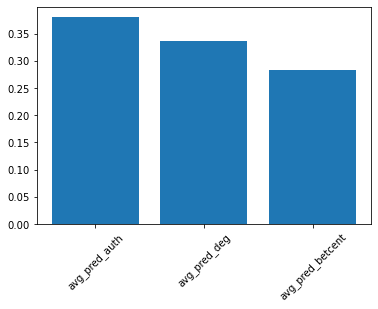

In [41]:
"""
Runs the Random Forest Classifier model
and displays the feature importance,
accuracy and f1 score.
"""

### fit training data on Random Forest Classifier 

rfc = RandomForestClassifier(n_estimators=20, random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

### display feature importances
plt.bar([X_train.columns[x] for x in range(len(rfc.feature_importances_))], rfc.feature_importances_)
plt.xticks(rotation=45)

## calculate accuracy and f1 score
print('Accuracy:', np.sum(y_pred == y_test) / len(y_test))
print("f1 score:", metrics.f1_score(y_test,y_pred))

Accuracy 0.7059587173828379
f1 score: 0.41952844695028185


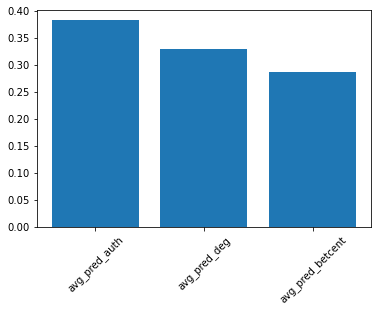

In [42]:
"""
Runs the Decision Tree Classifier
and displays the feature importance,
accuracy and f1 score.
"""

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

### display feature importances
plt.bar([X_train.columns[x] for x in range(len(dt.feature_importances_))], dt.feature_importances_)
plt.xticks(rotation=45)

## calcualte accuracy and f1 score
print('Accuracy', np.sum(y_pred_dt == y_test) / len(y_test))
print("f1 score:",metrics.f1_score(y_test,y_pred_dt))

Feature: avg_pred_auth, Score: 0.00006
Feature: avg_pred_deg, Score: -0.00511
Feature: avg_pred_betcent, Score: -0.00001


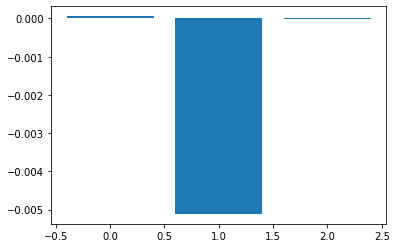

Accuracy: 0.7167337401012592
f1 score: 0.0


In [43]:
"""
Runs the Logistic Regression technique
and displays the feature importance,
accuracy and f1 score.
"""
lg = LogisticRegression()
lg.fit(X_train, y_train)

# summarize feature importance
importance = lg.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (X_train.columns[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## evaluation on test set
y_pred_lg=lg.predict(X_test)
print('Accuracy:', np.sum(y_pred_lg == y_test) / len(y_test))
print('f1 score:',metrics.f1_score(y_test,y_pred_lg))

### Save Model and predict on the unlabelled data

In [44]:
## predict the unlabelled data using the selected model

"""
options for model_select : 
rfc => random forest classifier
dt => decision tree
lg => logistic regression
"""
##### change accordingly
model_select = dt
#####

In [68]:
new_X = input_text.loc[:,input_col]

In [70]:
#### make prediction on unlabelled rows of input_text
y_pred = model_select.predict(new_X)

### save the selected model for future use

filename = 'emo-prediction_rft_model'
pickle.dump(model_select, open(model_save_folder +filename, 'wb'))

In [85]:
### make new dataframe to output 
res = new_X.copy()
res['word'] = bert_output['index']
res['emo?'] = y_pred
res['textid']=bert_output['from_textid']

In [73]:
# ### make new dataframe to output 
# res = new_X.copy()
# res['word'] = bert_output.loc[bert_y.isna(),'index']
# res['emo?'] = y_pred
# res['textid']=bert_output.loc[bert_y.isna(),'from_textid']

In [87]:
res.to_csv(emo_pred_file_name+".csv",index=False)

## Prediction using saved model

In [50]:
### Load saved model and assign emotion boolean results depending on whether the word is an emotion
model_file_path = "emo-prediction_rft_model"
loaded_model = pickle.load(open(model_save_folder + model_file_path, 'rb'))

result = loaded_model.predict(input_text[input_col])
res = input_text[input_col].copy()
res['word'] = input_text['index']
res['emo?'] = result
res['textid']=input_text['from_textid']
res.to_csv("predicted_results.csv",index=False)

## Merge with text corpus for prediction result reviews

**corpus_path** to read your original corpus

In [51]:
### read orignal text and merge with the prediction 
### change here
corpus_path = "../source_data/gme_corpus_inputs_10.csv"
###
corpus_orig = pd.read_csv(corpus_path)
corpus_orig = corpus_orig.reset_index()
corpus_orig.rename(columns={'index':'textid'},inplace=True)

In [52]:
## visualize some of the examples with the original snippet
res.merge(corpus_orig,on='textid',how='left')[:5]

,avg_pred_auth,avg_pred_deg,avg_pred_betcent,word,emo?,textid,snippet
0,-0.199660,60.0,31192.997540,consistently_2,0.0,0,Saxobank is consistently rated very poorly fro...
1,0.006583,138.4,8395.466771,poorly_5,1.0,0,Saxobank is consistently rated very poorly fro...
2,-0.799589,47.6,-0.800000,point_19,0.0,0,Saxobank is consistently rated very poorly fro...
3,0.023204,148.4,2654.367037,sense_28,0.0,0,Saxobank is consistently rated very poorly fro...
4,0.001094,58.4,1033.135066,entire_7,0.0,4,I wonder what would happen if the entire WSB a...


In [116]:
# ### only output predicted emo words together with the original text 
# emo_agg =  res.loc[res['emo?']==1].groupby('textid')['word'].agg(list).reset_index()
# emo_agg['word'] = emo_agg['word'].apply(lambda x: list(set(x)))
# emo_agg_with_text = pd.DataFrame(emo_agg)
# emo_agg_with_text.merge(corpus_orig,on='textid').to_csv(emo_pred_file_name+"_agg_with_corpus.csv",index=False)

In [55]:
# output = emo_agg_with_text.merge(corpus_orig, on='textid')
# output.head()

In [121]:
# output.to_csv(emo_pred_file_name+"_agg_with_corpusV2.csv", index = False)

In [56]:
# res2 = res[res['emo?']==1.0].groupby('textid')['word'].agg(list).reset_index()
# res2['word'] = res2['word'].apply(lambda x: list(set(x)))
# res2.head(25)

In [100]:
### only output predicted emo words together with the original text 
emo_agg =  res.loc[res['emo?']==1].groupby('textid')['word'].agg(list)
emo_agg_with_text = pd.DataFrame(emo_agg)
emo_agg_with_text.merge(corpus_orig,on='textid').to_csv(emo_pred_file_name+"_agg_with_corpus.csv",index=False)

In [57]:
# res2.groupby('textid')['word'].agg(list)